In [3]:
# Importing Important libraries
import numpy as np # For Scientific Computation
import matplotlib.pyplot as plt # Visualization Library
import matplotlib

In [4]:
# Fetching of data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
# Retrieving features and labels
X = mnist['data']
Y = mnist['target']

In [6]:
# Converting into NumPy array with integer datatype
X = np.array(X , dtype = 'int32')
Y = np.array(Y , dtype = 'int32')

In [7]:
# Reshaping
Y = Y.reshape(1,70000)
X = X.reshape(70000,-1).T
print(X.shape)

(784, 70000)


In [8]:
# Verifying the shape of image
Lets_plot = X[:,60000]
Lets_plot_image = Lets_plot.reshape(28,28)
print(Lets_plot_image.shape)

(28, 28)


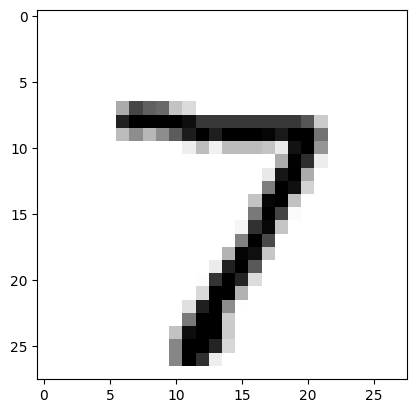

In [9]:
# Plotting any one image to verify the correct fetching of data
plt.imshow(Lets_plot_image, cmap = matplotlib.cm.binary, interpolation = "nearest")

In [10]:
# Label Corresponding to above image
Y[:,60000]

array([7], dtype=int32)

In [11]:
# Pre-Processing of the data
X_train = X[:,:60000]
X_test  = X[:,60000:]
Y_train = Y[:,:60000]
Y_test  = Y[:,60000:]
X_train = X_train
X_test = X_test
X_train = X_train / 255
X_test = X_test / 255
Y_train.size

60000

In [12]:
# Initialization
def initialize_parameters():
  W1 = np.random.randn(100,784) * 0.01
  W2 = np.random.randn(50,100)  * 0.01
  W3 = np.random.randn(25,50)   * 0.01
  W4 = np.random.randn(10,25)   * 0.01
  b1 = np.zeros((100,1))
  b2 = np.zeros((50,1))
  b3 = np.zeros((25,1))
  b4 = np.zeros((10,1))
  parameters = { "W1": W1, "W2": W2, "W3": W3, "W4": W4, "b1": b1, "b2": b2, "b3": b3, "b4": b4 }
  return parameters

In [13]:
# Activations
def ReLU(Z):
  return np.maximum(Z, 0)

def SoftMax(Z):
  A = np.exp(Z) / np.sum(np.exp(Z), axis = 0, keepdims = True)
  return A

In [14]:
# Forward Propagation
def forward_propagation(params, X):
  W1 = params["W1"]
  W2 = params["W2"]
  W3 = params["W3"]
  W4 = params["W4"]
  b1 = params["b1"]
  b2 = params["b2"]
  b3 = params["b3"]
  b4 = params["b4"]
  Z1 = np.dot(W1,X) + b1
  A1 = ReLU(Z1)
  Z2 = np.dot(W2,A1) + b2
  A2 = ReLU(Z2)
  Z3 = np.dot(W3,A2) + b3
  A3 = ReLU(Z3)
  Z4 = np.dot(W4,A3) + b4
  A4 = SoftMax(Z4)
  return Z1, A1, Z2, A2, Z3, A3, Z4, A4

In [15]:
def compute_cost(A4, Y):
  m = Y.size
  cost = -1/m * np.sum(Y*np.log(A4))
  return cost

In [16]:
def one_hot(Y):
  encoded_array = np.zeros((Y.size, Y.max() + 1))
  encoded_array[np.arange(Y.size), Y] = 1
  encoded_array = encoded_array.T
  return encoded_array

def relu_derivative(Z):
  return Z >= 0

In [17]:
# backward Propagation
def backward_propagation(Z1, A1, Z2, A2, Z3, A3, Z4, A4, W2, W3, W4, X, Y):
  m = Y.size
  dZ4 = A4 - one_hot(Y)
  dW4 = 1/m * np.dot(dZ4,A3.T)
  db4 = 1/m * np.sum(dZ4, axis =1, keepdims = True)
  dZ3 = np.dot(W4.T, dZ4) * relu_derivative(Z3)
  dW3 = 1/m * np.dot(dZ3,A2.T)
  db3 = 1/m * np.sum(dZ3, axis =1, keepdims = True)
  dZ2 = np.dot(W3.T, dZ3) * relu_derivative(Z2)
  dW2 = 1/m * np.dot(dZ2,A1.T)
  db2 = 1/m * np.sum(dZ2, axis = 1, keepdims = True)
  dZ1 = np.dot(W2.T, dZ2) * relu_derivative(Z1)
  dW1 = 1/m * np.dot(dZ1,X.T)
  db1 = 1/m * np.sum(dZ1,axis = 1, keepdims = True)
  grads ={ "dW1": dW1, "dW2": dW2, "dW3": dW3, "dW4": dW4, "db1": db1, "db2": db2, "db3": db3, "db4": db4  }
  return grads

In [18]:
def update_parameters(params, grads, Learning_rate):
  parameters = params.copy()

  L = len(parameters)//2

  for l in range(L):
      parameters["W" + str(l+1)] = params["W" + str(l+1)] - Learning_rate*grads["dW" + str(l+1)]
      parameters["b" + str(l+1)] = params["b" + str(l+1)] - Learning_rate*grads["db" + str(l+1)]

  return parameters

In [19]:
def get_predictions(A2):
  return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
  print(predictions, Y)
  return np.sum(predictions == Y)/ Y.size

def Gradient_Descent(X, Y, No_Of_Iterations, Learning_Rate):
  parameters = initialize_parameters()

  for i in range(0, No_Of_Iterations):
    Z1, A1, Z2, A2, Z3, A3, Z4, A4 = forward_propagation(parameters, X)
    cost = compute_cost(A4, one_hot(Y))
    grads = backward_propagation(Z1, A1, Z2, A2, Z3, A3, Z4, A4, parameters["W2"], parameters["W3"], parameters["W4"], X, Y)
    parameters = update_parameters(parameters, grads, Learning_Rate)
    if i% 100 == 0:
      print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
    if i % 100 == 0 or i == No_Of_Iterations:
      print("Iterations: " + str(i))
      predictions = get_predictions(A4)
      print("Accuracy  :" + str(get_accuracy(predictions, Y)))
  return parameters, cost

In [27]:
parameters, cost = Gradient_Descent(X_train, Y_train, 2000, 0.5)

Cost after iteration 0: 0.2302585288364261
Iterations: 0
[6 8 8 ... 9 8 8] [[5 0 4 ... 5 6 8]]
Accuracy  :0.11861666666666666
Cost after iteration 100: 0.23011515923332554
Iterations: 100
[1 1 1 ... 1 1 1] [[5 0 4 ... 5 6 8]]
Accuracy  :0.11236666666666667
Cost after iteration 200: 0.23011455462439276
Iterations: 200
[1 1 1 ... 1 1 1] [[5 0 4 ... 5 6 8]]
Accuracy  :0.11236666666666667
Cost after iteration 300: 0.23011355975442002
Iterations: 300
[1 1 1 ... 1 1 1] [[5 0 4 ... 5 6 8]]
Accuracy  :0.11236666666666667
Cost after iteration 400: 0.23011151012254133
Iterations: 400
[1 1 1 ... 1 1 1] [[5 0 4 ... 5 6 8]]
Accuracy  :0.11236666666666667
Cost after iteration 500: 0.23010548923892357
Iterations: 500
[1 1 1 ... 1 1 1] [[5 0 4 ... 5 6 8]]
Accuracy  :0.11236666666666667
Cost after iteration 600: 0.23005901261810785
Iterations: 600
[1 1 1 ... 1 1 1] [[5 0 4 ... 5 6 8]]
Accuracy  :0.11236666666666667
Cost after iteration 700: 0.1794356805162143
Iterations: 700
[3 2 7 ... 1 3 3] [[5 0 4 .

In [26]:
Z1, A1, Z2, A2, Z3, A3, Z4, A4 = forward_propagation(parameters, X_test)
predictions = get_predictions(A4)
print("Accuracy  :" + str(get_accuracy(predictions, Y_test)))

[7 2 1 ... 4 5 6] [[7 2 1 ... 4 5 6]]
Accuracy  :0.9179
